In [1]:
import sys
import os
import numpy as np
import pandas as pd

sys.path.append('../')
from src_experiment import get_path_to_moon_experiment_storage, get_test_moon_path
from geobin import EstimateQuantities1Run, AveragedEstimates

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_test_moon_path(model_name, dataset_name, noise_level, int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()


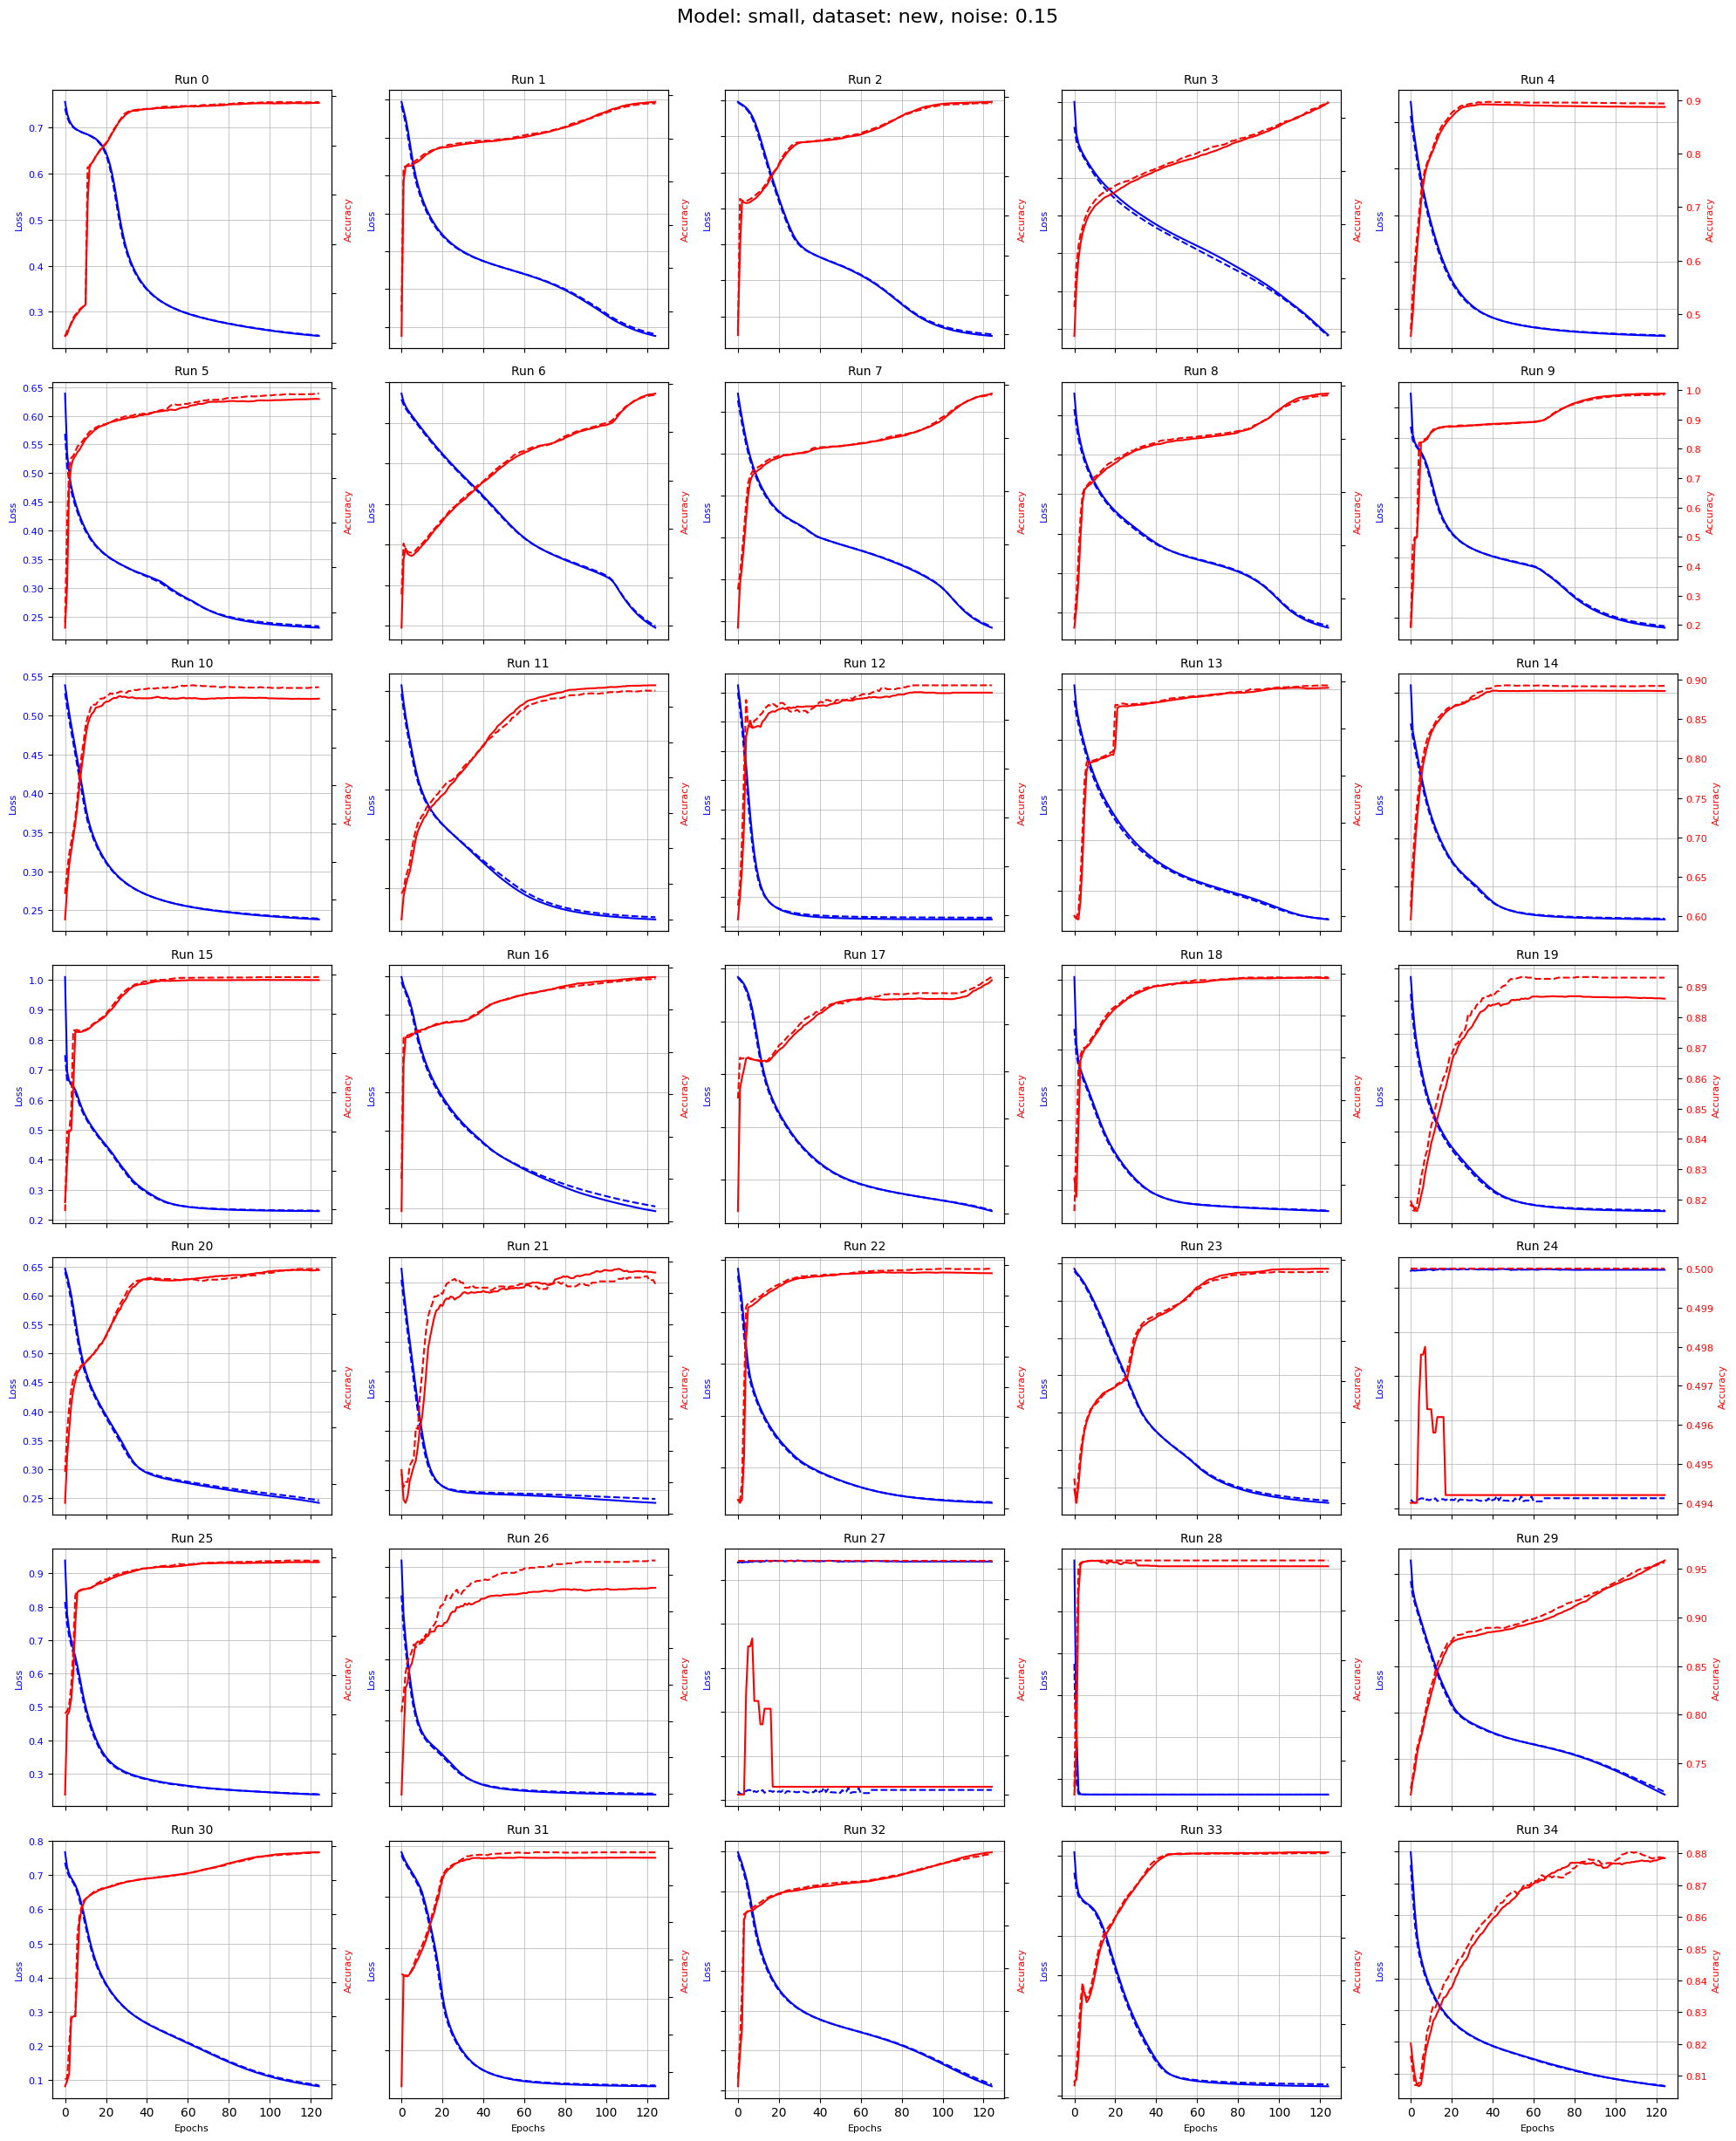

In [3]:
plot_multiple_runs_grid(model_name="small",
                        dataset_name="new",
                        noise_level=0.15)

In [4]:
def plot_multiple_runs_grid(model_name, dataset_name, noise_level, run_numbers=np.arange(35, dtype=np.int64), figsize=(20, 25)):
    """
    Plot multiple runs in a 5x5 grid. 
    Bottom row shows x-ticks, leftmost column shows primary y-ticks.
    Rightmost column shows secondary y-ticks.
    """
    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)  # <-- remove sharex/sharey
    axes = axes.flatten()
    
    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]
        
        # Load run summary CSV
        summary_path = get_test_moon_path(model_name, dataset_name, noise_level, int(run_number)) / "run_summary.csv"
        df = pd.read_csv(summary_path)
        epochs = range(len(df))
        
        # ---- Loss (left y-axis) ----
        ax.plot(epochs, df["train_loss"], color="blue", lw=1.5)
        ax.plot(epochs, df["test_loss"], color="blue", ls="dashed", lw=1.5)
        ax.set_ylabel("Loss", color="blue", fontsize=8)
        ax.tick_params(axis='y', labelcolor="blue", labelsize=8)
        
        # ---- Accuracy (right y-axis) ----
        ax2 = ax.twinx()
        ax2.plot(epochs, df["train_accuracy"], color="red", lw=1.5)
        ax2.plot(epochs, df["test_accuracy"], color="red", ls="dashed", lw=1.5)
        ax2.set_ylabel("Accuracy", color="red", fontsize=8)
        ax2.tick_params(axis='y', labelcolor="red", labelsize=8)
        
        # Title
        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)
        
        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols
        
        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
            ax2.set_xticklabels([])
        else:
            ax.set_xlabel("Epochs", fontsize=8)
        
        # Only first column keeps primary y-ticks
        if col != 0:
            ax.set_yticklabels([])
        
        # Only last column keeps secondary y-ticks
        if col != n_cols - 1:
            ax2.set_yticklabels([])
    
    fig.suptitle(f"Model: {model_name}, dataset: {dataset_name}, noise: {noise_level}", fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.97])
    plt.show()

In [5]:
first_run = EstimateQuantities1Run(model_name="small", dataset_name="new", noise_level=0.15, run_number=0)

In [6]:
MI = first_run.estimates["MI_KL"]
MI

[]

In [7]:
first_run.calculate_estimates()
MI = first_run.estimates["MI_KL"]
MI

,epoch,l1,l2,l3,l4
0,0,0.318716,0.320329,0.320392,0.320429
1,5,0.315851,0.323062,0.324545,0.324545
2,10,0.313772,0.317764,0.317764,0.317764
3,15,0.310403,0.313089,0.313089,0.335232
4,20,0.307975,0.309136,0.309136,0.336890
5,25,0.313062,0.313167,0.313283,0.344824
6,30,0.319660,0.319823,0.319823,0.352820
7,35,0.324769,0.325435,0.325843,0.360484
8,40,0.323257,0.324154,0.324735,0.368601
9,45,0.323134,0.325166,0.326603,0.370577


In [8]:
import matplotlib.pyplot as plt

def plot_layers_exclude_last(df, lw=2):
    """
    Plot all layers except the last one on the same figure as functions of epoch.
    
    Parameters
    ----------
    df : pd.DataFrame
        DataFrame with columns 'epoch' and layers like 'l1', 'l2', ...
    lw : float
        Line width for the curves.
    """
    # All columns except 'epoch' and the last layer
    layers = df.columns[1:-1]  # skip first (epoch) and last
    
    plt.figure(figsize=(10, 6))
    
    for layer in layers:
        plt.plot(df["epoch"], df[layer], lw=lw, label=layer)
    
    plt.xlabel("Epoch")
    plt.ylabel("Value")
    plt.title("Layer values as a function of epoch (excluding last layer)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


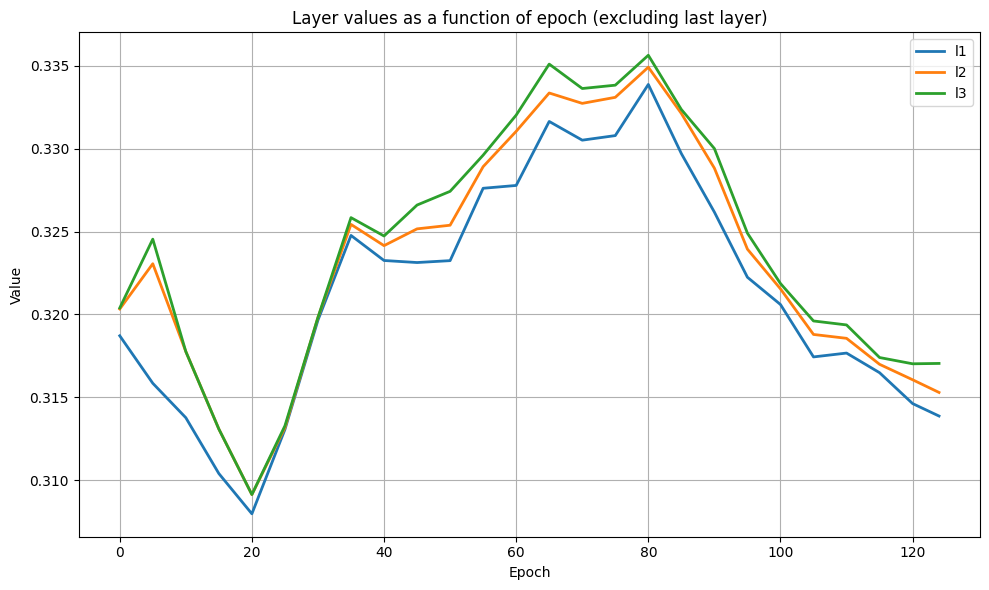

In [9]:
plot_layers_exclude_last(MI)

In [10]:
import numpy as np
import matplotlib.pyplot as plt

def plot_multiple_runs_MI_layers_grid(
    model_name,
    dataset_name,
    noise_level,
    run_numbers=np.arange(35, dtype=np.int64),
    figsize=(20, 25),
    lw=1.5
):
    """
    Plot MI_KL layer-wise values (excluding last layer) for multiple runs in a grid.
    
    Each subplot corresponds to one run.
    Bottom row shows x-ticks.
    Leftmost column shows y-ticks.
    """

    n_rows, n_cols = 7, 5
    fig, axes = plt.subplots(n_rows, n_cols, figsize=figsize)
    axes = axes.flatten()

    for idx, run_number in enumerate(run_numbers):
        ax = axes[idx]

        # ---- Load and compute MI estimates for one run ----
        run = EstimateQuantities1Run(
            model_name=model_name,
            dataset_name=dataset_name,
            noise_level=noise_level,
            run_number=int(run_number)
        )
        run.calculate_estimates()
        df = run.estimates["MI_IS"]

        # All layers except 'epoch' and the last layer
        layers = df.columns[1:-1]

        # ---- Plot layers ----
        for layer in layers:
            ax.plot(df["epoch"], df[layer], lw=lw)

        ax.set_title(f"Run {run_number}", fontsize=10)
        ax.grid(True, lw=0.5)

        # ---- Manage ticks ----
        row = idx // n_cols
        col = idx % n_cols

        # Only bottom row keeps x-ticks
        if row != n_rows - 1:
            ax.set_xticklabels([])
        else:
            ax.set_xlabel("Epoch", fontsize=8)

        # Only first column keeps y-ticks
        if col != 0:
            ax.set_yticklabels([])
        else:
            ax.set_ylabel("MI (KL)", fontsize=8)

        ax.tick_params(axis="both", labelsize=8)

    # Remove unused axes if run_numbers < grid size
    for j in range(len(run_numbers), n_rows * n_cols):
        fig.delaxes(axes[j])

    fig.suptitle(
        f"MI_KL across layers (excluding last)\n"
        f"Model: {model_name}, Dataset: {dataset_name}, Noise: {noise_level}",
        fontsize=16
    )

    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


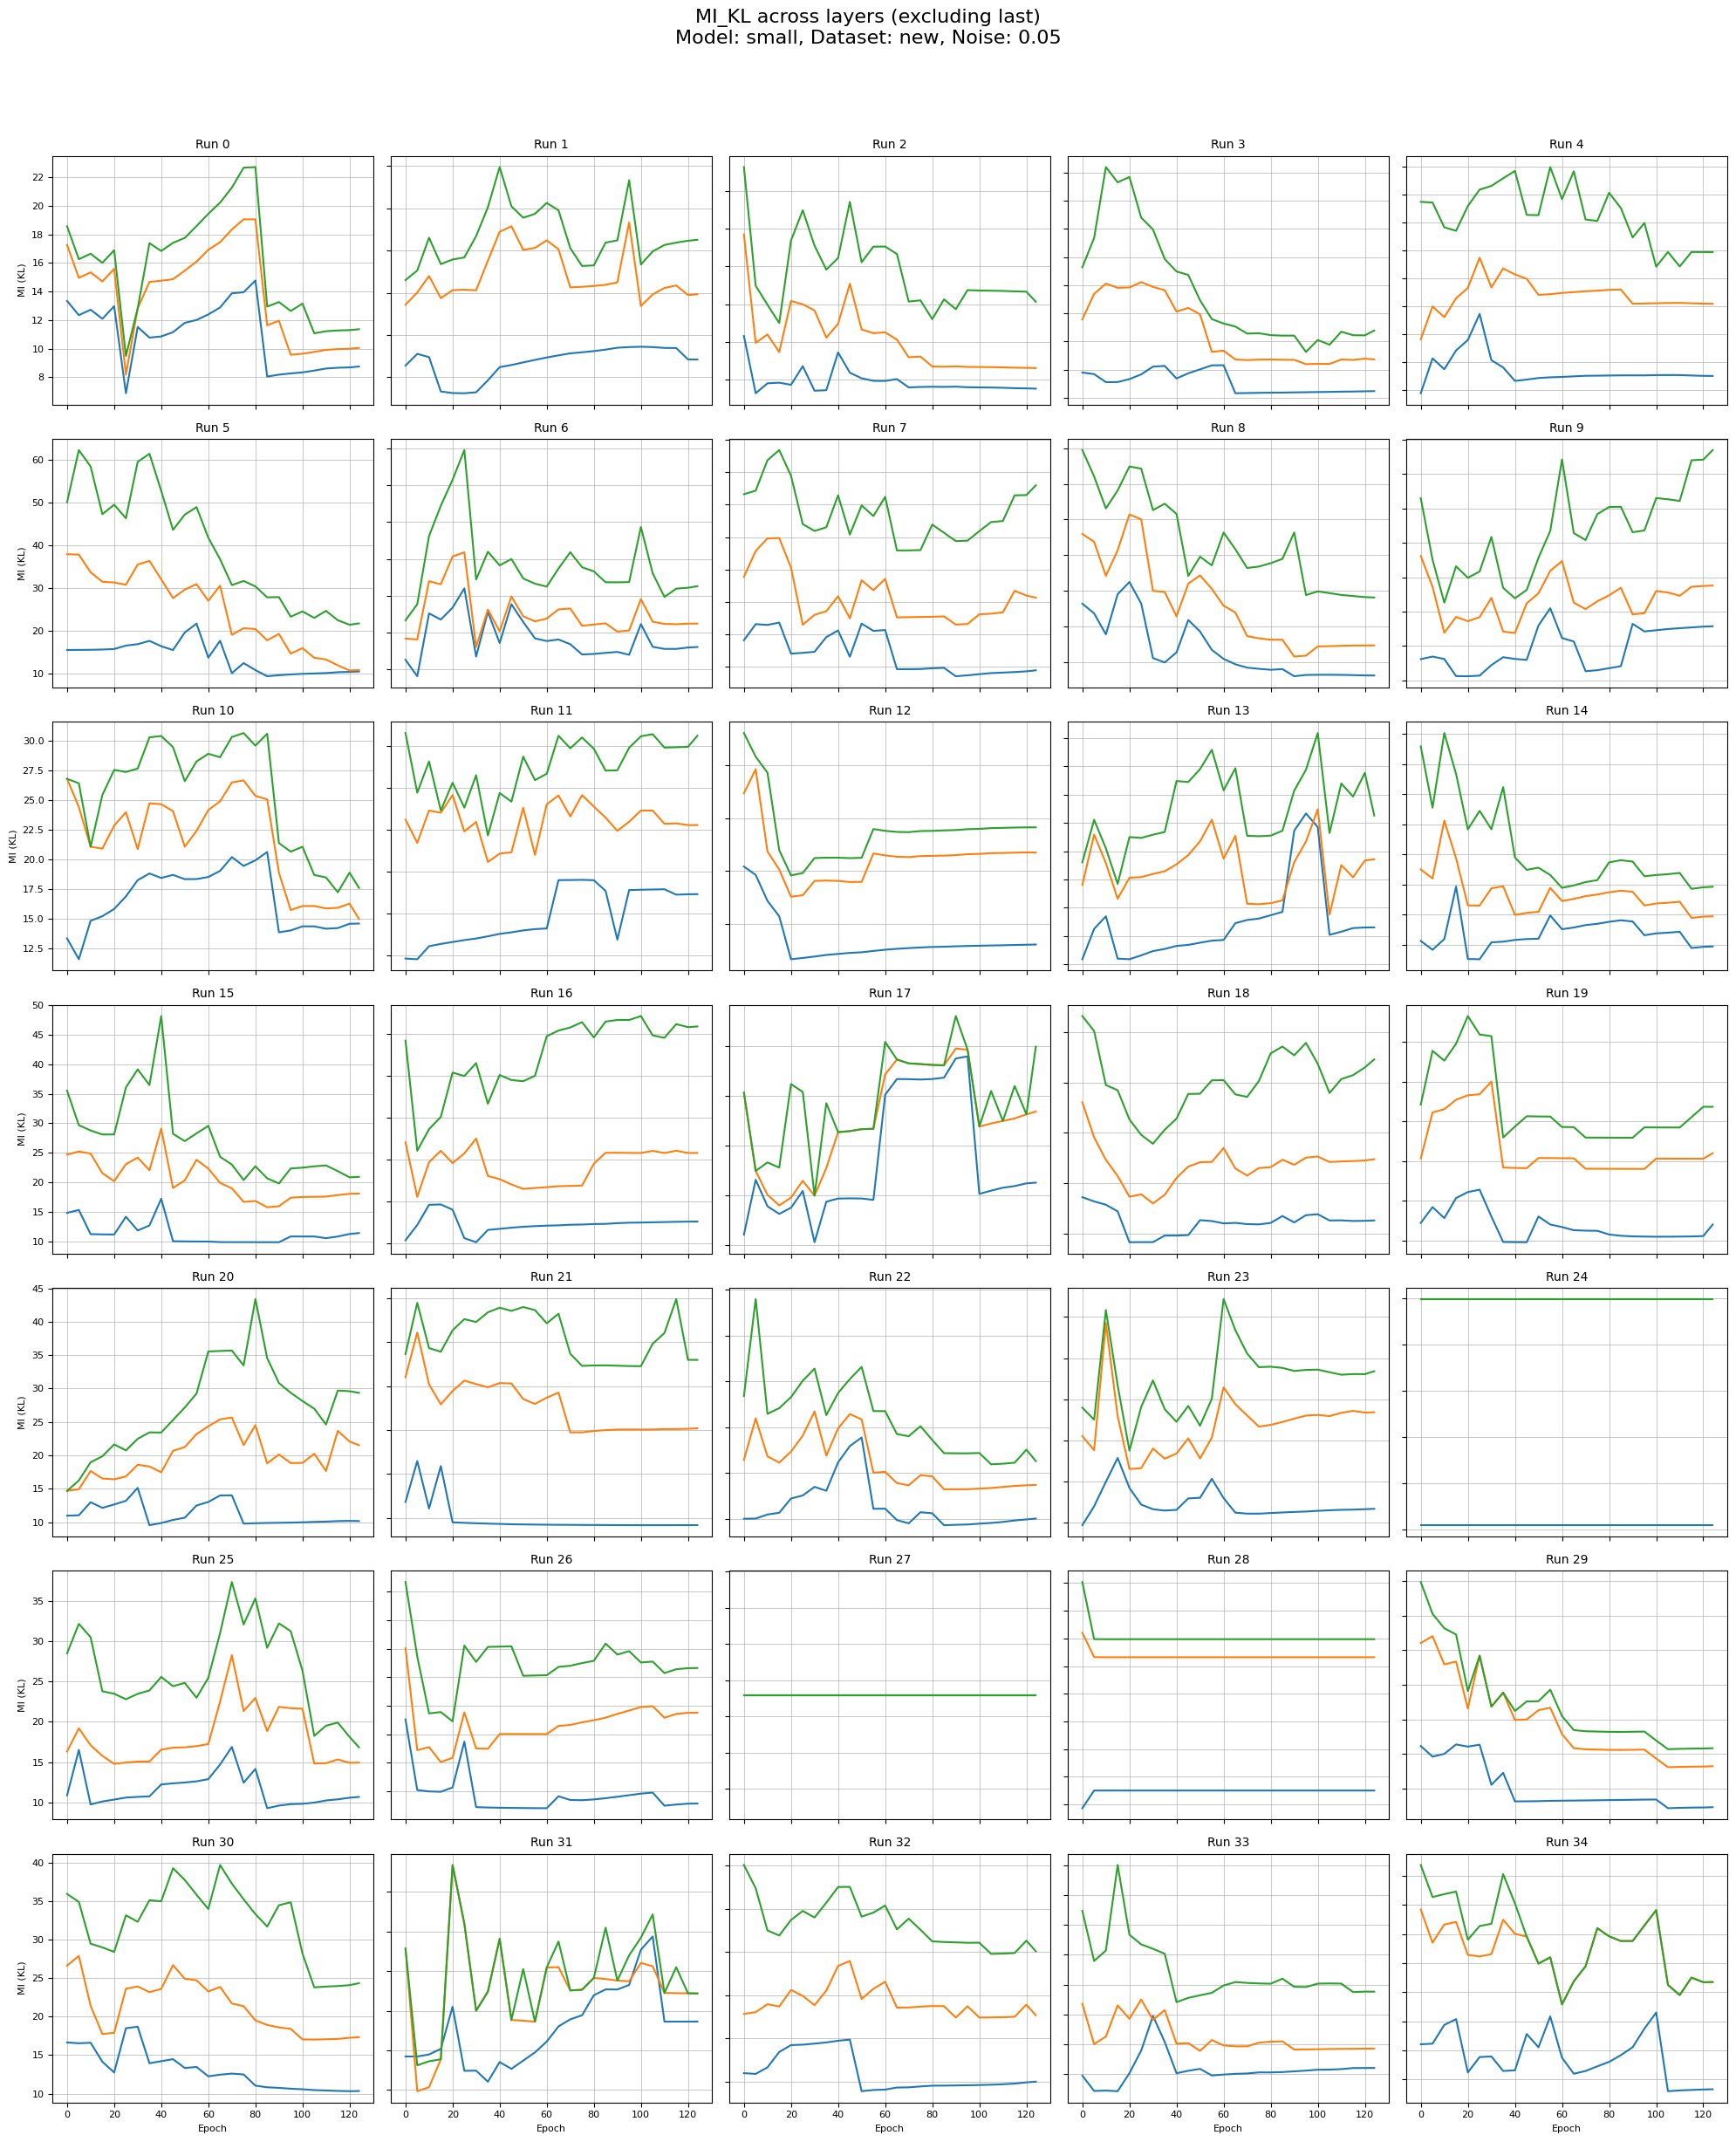

In [11]:
plot_multiple_runs_MI_layers_grid(
    model_name="small",
    dataset_name="new",
    noise_level=0.05,
    run_numbers=np.arange(35)
)

In [12]:
avg1 = AveragedEstimates(noise_level=0.05)
avg1._find_from_all_runs()

In [13]:
dfs = avg1.individual_estimates["MI_IS"]

In [14]:
all_runs = (
    pd.concat(dfs, keys=range(35), names=["run", "row"])
      .reset_index(level="run")
)


In [15]:
all_runs

,run,epoch,l1,l2,l3,l4
row,,,,,,
0,0,0,13.342362,17.262920,18.569773,19.876626
1,0,5,12.344845,14.958551,16.265403,17.572256
2,0,10,12.728382,15.342088,16.648940,21.787601
3,0,15,12.090491,14.704197,16.011050,21.121421
4,0,20,12.974004,15.587710,16.894562,20.759953
...,...,...,...,...,...,...
21,34,105,8.992541,18.130997,18.130997,24.302318
22,34,110,9.060137,17.259824,17.259824,23.510791
23,34,115,9.099793,18.761158,18.761158,23.713609


In [16]:
summary = (
    all_runs
    .groupby("epoch")[["l1", "l2", "l3", "l4"]]
    .agg(["mean", "std"])
)


In [17]:
summary

l1                   l2                   l3             \
            mean       std       mean       std       mean        std   
epoch                                                                   
0      12.564956  2.699989  21.862439  6.406926  28.916314   9.971187   
5      12.661494  2.650524  20.911770  6.728924  27.346365  10.631087   
10     12.651897  2.426083  20.685121  6.211144  26.880666  10.338254   
15     12.917046  3.008954  19.860198  5.652921  26.236716   9.871311   
20     12.281633  3.004443  19.916213  5.457359  26.559509   9.125783   
25     12.666689  3.296316  20.192880  5.698790  26.743530   8.568840   
30     11.982899  3.042335  19.541815  5.491120  26.380369   9.378835   
35     11.922519  2.792966  19.283887  4.995021  26.138743   8.842488   
40     11.984889  2.693393  19.401717  4.784171  26.458633   8.869925   
45     12.117451  2.896595  19.699977  4.434783  25.394689   7.457954   
50     12.450623  3.151072  19.441646  4.485376  25.299901   7.562637   
55     12.438591  3.290071  19.500247  4.367279  25.603244   7.802968   
60     11.985273  2.548061  19.720791  4.635853  26.409141   8.179336   
65     12.040938  2.972106  19.397192  4.544069  25.867986   7.381381   
70     11.782257  3.001062  18.417369  4.117512  24.868643   7.173475   
75     11.612155  2.753824  18.290377  3.906004  24.747367   7.049436   
80     11.681763  2.882773  18.390991  3.899130  25.239543   7.928874   
85     11.354474  2.940864  17.826927  3.860929  24.551611   7.471901   
90     11.355838  3.131540  17.533000  3.642734  24.147216   7.246759   
95     11.654710  3.408921  17.619452  4.374427  24.230390   7.696480   
100    11.726181  3.345466  17.727417  4.265555  23.956211   7.370192   
105    11.154628  2.698581  16.947859  3.936844  22.674762   6.869311   
110    11.022576  2.491272  16.908313  3.800601  22.636326   7.156454   
115    11.016827  2.412489  17.205393  4.166226  23.240528   7.958217   
120    11.045303  2.411481  17.169502  4.111694  23.139660   7.959358   
124    11.119649  2.416904  17.121277  4.117915  23.153128   8.294562   

              l4             
            mean        std  
epoch                        
0      32.675317  10.987879  
5      30.813804  12.058752  
10     30.879693  11.365139  
15     29.959422  10.662434  
20     30.773016  10.209628  
25     30.986547   9.808462  
30     30.438000  10.889244  
35     29.930714   9.580805  
40     30.502071   9.752246  
45     29.212168   8.470316  
50     29.491937   8.676294  
55     29.593234   9.103158  
60     30.349905   9.595605  
65     29.821306   8.628763  
70     29.171584   8.304771  
75     28.831713   7.981594  
80     29.631868   8.629224  
85     28.690308   8.265324  
90     28.476937   8.377143  
95     28.153939   8.390829  
100    27.723158   7.759780  
105    26.662241   7.106393  
110    26.172406   7.068659  
115    26.336407   7.666899  
120    25.918921   7.734834  
124    25.866750   8.062071

In [18]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_runs_with_mean_std(dfs, layers=None, alpha_runs=0.2, lw_runs=0.8, lw_mean=2.5):
    """
    Plot all runs as thin lines and overlay mean ± std.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    alpha_runs : float
        Transparency of individual runs.
    lw_runs : float
        Line width of individual runs.
    lw_mean : float
        Line width of mean curve.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    for layer in layers:
        fig, ax = plt.subplots()

        # Plot individual runs
        for _, df in all_runs.groupby("run"):
            ax.plot(df["epoch"], df[layer], alpha=alpha_runs, lw=lw_runs)

        # Mean and std across runs
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        ax.plot(stats["epoch"], stats["mean"], lw=lw_mean, label="mean")
        ax.fill_between(
            stats["epoch"],
            stats["mean"] - stats["std"],
            stats["mean"] + stats["std"],
            alpha=0.3,
            label="±1 std"
        )

        ax.set_xlabel("Epoch")
        ax.set_ylabel(layer)
        ax.set_title(f"{layer}: runs, mean ± std")
        ax.legend()
        ax.grid(True)

        plt.show()


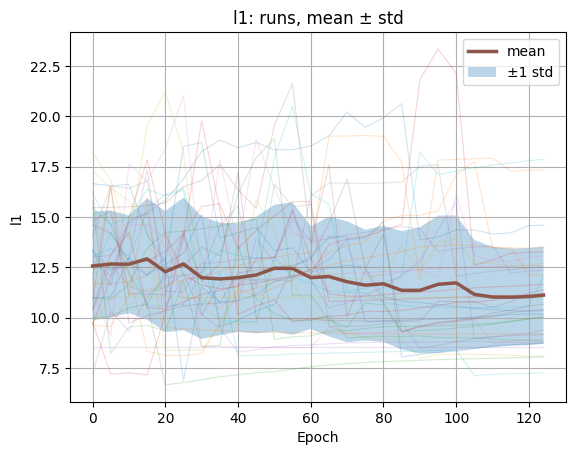

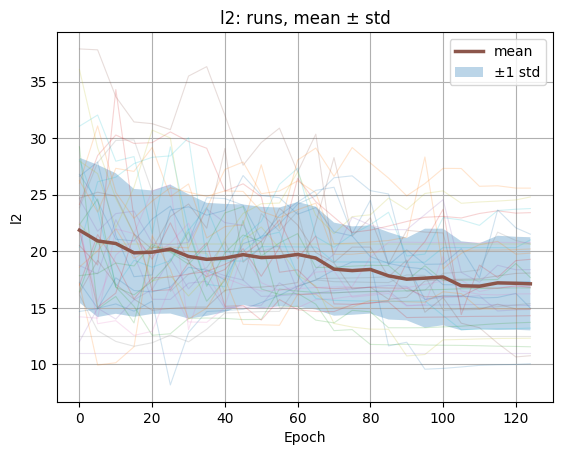

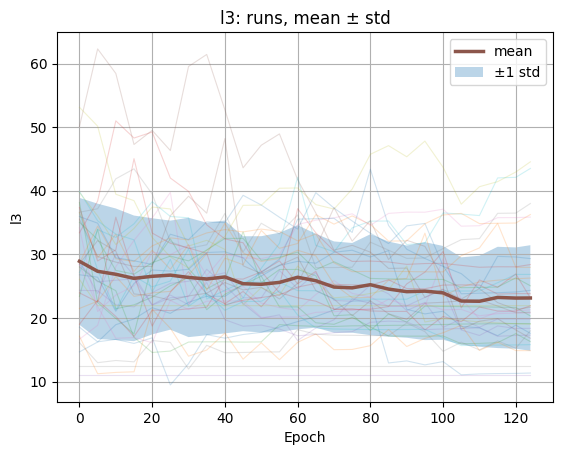

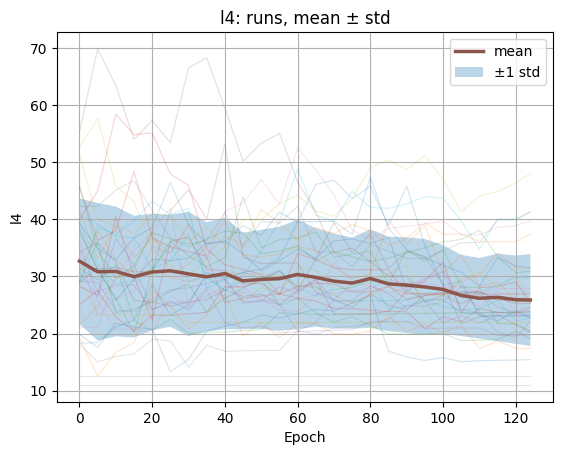

In [19]:
plot_runs_with_mean_std(dfs)

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

def plot_layer_means_same_figure(
    dfs,
    layers=None,
    lw_mean=2.5,
    alpha_std=0.25,
    show_std=True,
    logy=True
):
    """
    Plot mean (and optionally ± std) across runs for all layers
    in a single figure, with optional log-scale y-axis.

    Parameters
    ----------
    dfs : list[pd.DataFrame]
        One DataFrame per run, with columns ['epoch', 'l1', 'l2', ...]
    layers : list[str], optional
        Which layer columns to plot. Defaults to all except 'epoch'.
    lw_mean : float
        Line width of mean curves.
    alpha_std : float
        Transparency of std shading.
    show_std : bool
        Whether to show ±1 std shading.
    logy : bool
        Whether to use logarithmic y-axis.
    """

    if layers is None:
        layers = [c for c in dfs[0].columns if c != "epoch"]

    # Stack runs
    all_runs = pd.concat(dfs, keys=range(len(dfs)), names=["run"])
    all_runs = all_runs.reset_index(level="run")

    fig, ax = plt.subplots(figsize=(10, 6))

    for layer in layers:
        stats = (
            all_runs
            .groupby("epoch")[layer]
            .agg(["mean", "std"])
            .reset_index()
        )

        # Mean curve
        ax.plot(
            stats["epoch"],
            stats["mean"],
            lw=lw_mean,
            label=layer
        )

        # Std shading
        if show_std:
            ax.fill_between(
                stats["epoch"],
                stats["mean"] - stats["std"],
                stats["mean"] + stats["std"],
                alpha=alpha_std
            )

    ax.set_xlabel("Epoch")
    ax.set_ylabel("Value")
    ax.set_title("Layer-wise mean (± std) across runs")

    if logy:
        ax.set_yscale("log")

    ax.legend(title="Layer")
    ax.grid(True, which="both", lw=0.5)
    plt.tight_layout()
    plt.show()


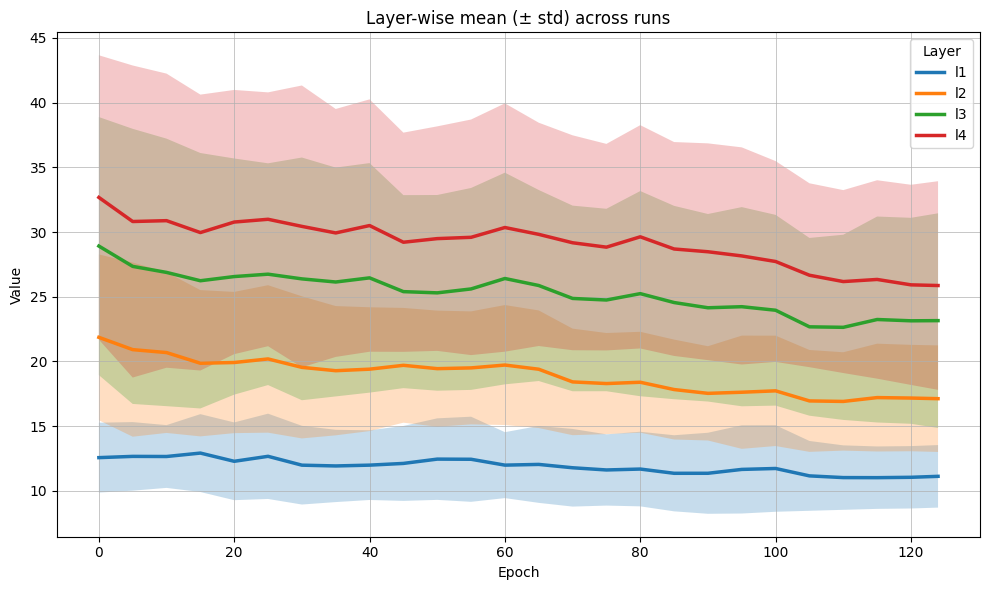

In [21]:
plot_layer_means_same_figure(
    dfs=dfs,          # list of MI_KL DataFrames
    show_std=True,
    logy=False
)
